# Pulsar Emission Data Analysis

# All Imports that may or may not be needed and used for the notebook


In [148]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats
import statistics
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat
from numpy import array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional

# Section for extracting from a tar file. #

##### Currently implemented for original TAR File structure.

In [149]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

## Beginning of Exploration

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [150]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar = pd.read_csv("Data/J0437-4715.pulses", sep = ' ', header = None, names = colnames)

In [151]:
pulsar.shape

(27000, 3)

In [152]:
pulsar.head(25)

,Pulse Number,Brightness,Uncertainty
0,1,0.598393,0.056431
1,2,0.590859,0.055182
2,3,0.449643,0.063632
3,4,0.682860,0.056269
4,5,0.490026,0.046830
5,6,0.586071,0.052649
6,7,0.150353,0.056483
7,8,0.384684,0.052567
8,9,0.429094,0.055569
9,10,0.995865,0.075811


In [153]:
pulsar.describe()

,Pulse Number,Brightness,Uncertainty
count,27000.00000,27000.000000,27000.000000
mean,13500.50000,0.536400,0.062556
std,7794.37297,0.413764,0.056313
min,1.00000,-5.114133,0.015426
25%,6750.75000,0.296443,0.052381
50%,13500.50000,0.423816,0.056856
75%,20250.25000,0.643723,0.063111
max,27000.00000,18.722410,3.049559


In [154]:
nullBoolBrightness = pd.isnull(pulsar["Brightness"])

pulsar[nullBoolBrightness]

,Pulse Number,Brightness,Uncertainty


In [155]:
pulsar["Brightness"].describe()

count    27000.000000
mean         0.536400
std          0.413764
min         -5.114133
25%          0.296443
50%          0.423816
75%          0.643723
max         18.722410
Name: Brightness, dtype: float64

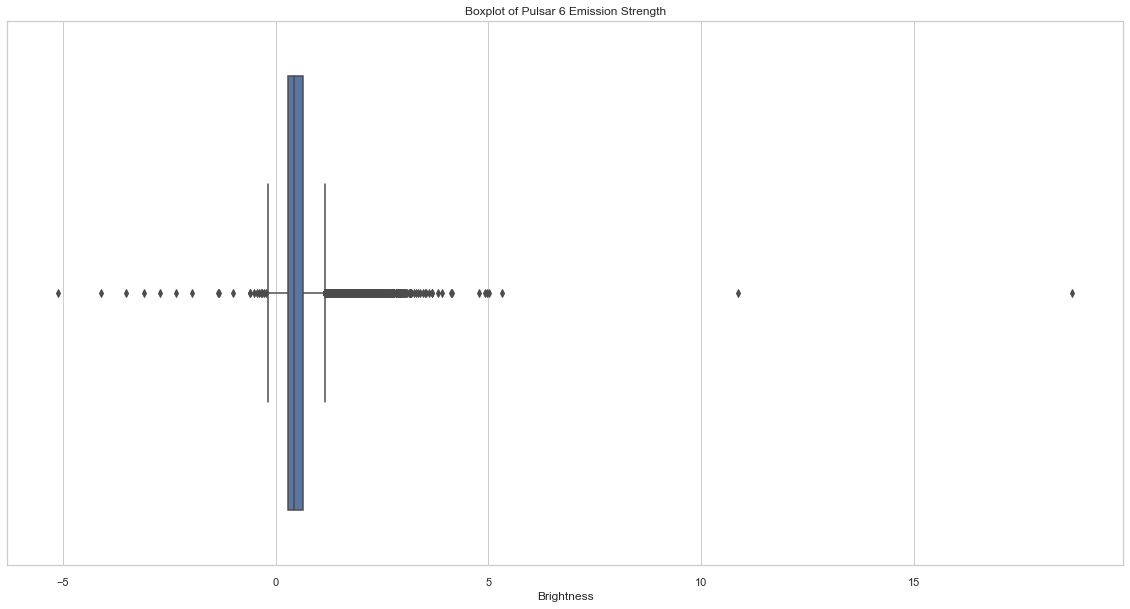

In [156]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

In [157]:
medianpulse6 = pulsar["Brightness"].median()
print("Median of Pulsar6: ", medianpulse6)
pulsar['Binary'] = np.where(pulsar['Brightness'] > medianpulse6, 1, 0)

Median of Pulsar6:  0.42381595


In [158]:
pulsar

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.598393,0.056431,1
1,2,0.590859,0.055182,1
2,3,0.449643,0.063632,1
3,4,0.682860,0.056269,1
4,5,0.490026,0.046830,1
...,...,...,...,...
26995,26996,0.539079,0.063854,1
26996,26997,0.324070,0.054332,0
26997,26998,0.291341,0.058106,0
26998,26999,0.346267,0.058064,0


c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


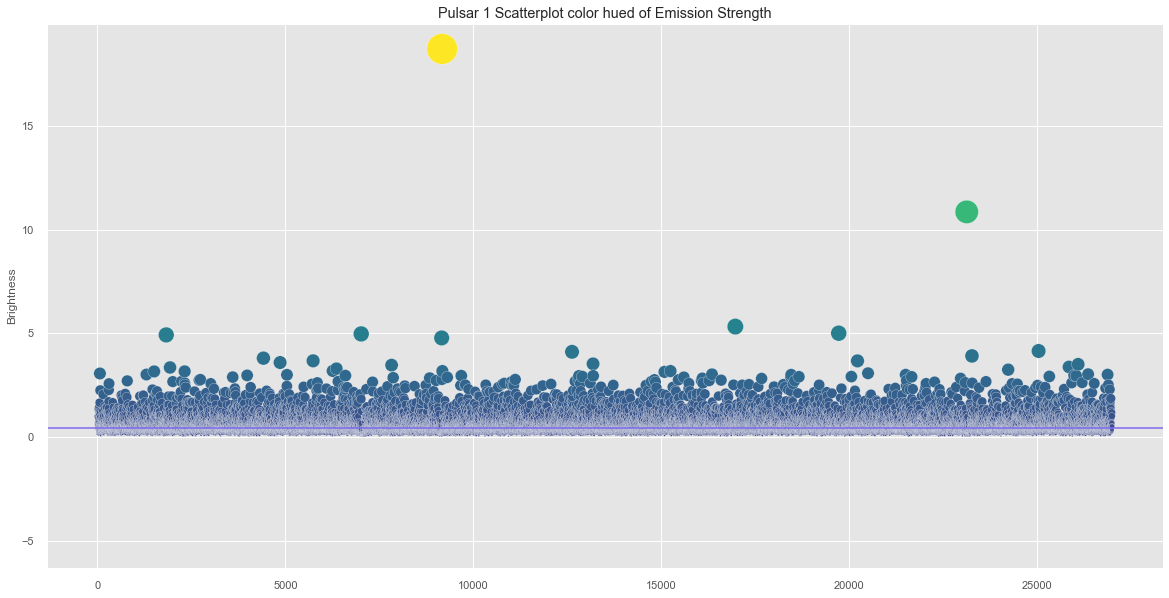

In [159]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 1 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.42381595, ls='-',c='mediumslateblue')

In [160]:
print(len(pulsar[(pulsar.Brightness > 0.42381595)]))
print(len(pulsar[(pulsar.Brightness < 0.42381595)]))

13500
13500


In [161]:
#plt.figure(figsize=(20,10))
#sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#strength = pulsar.Brightness.values
#ax = plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')
#ax = sns.swarmplot(data=pulsar["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')


c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 Brightness')

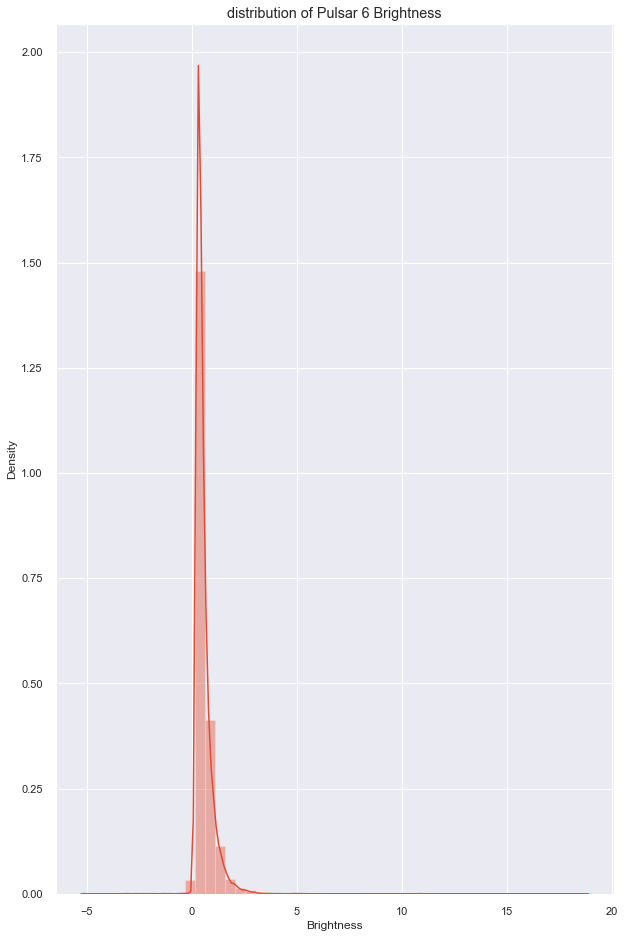

In [162]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar.Brightness)
plt.title("distribution of Pulsar 6 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 binary assignments')

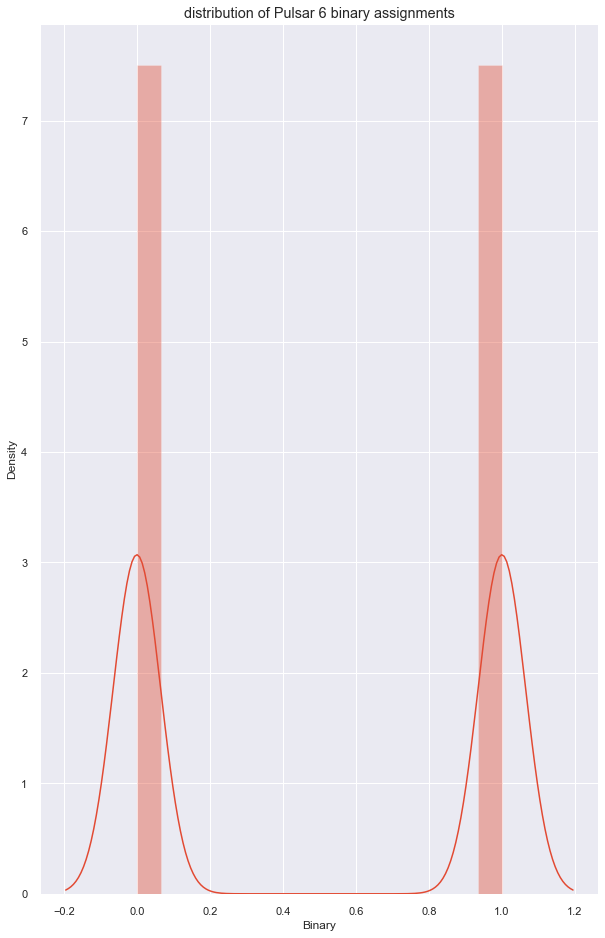

In [163]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar.Binary)
plt.title("distribution of Pulsar 6 binary assignments")

# Rolling Medians, Rolling Means, Binned Medians and Binned Mean analysis.


In [164]:
data = pulsar["Brightness"]
data

0        0.598393
1        0.590859
2        0.449643
3        0.682860
4        0.490026
           ...   
26995    0.539079
26996    0.324070
26997    0.291341
26998    0.346267
26999    0.513315
Name: Brightness, Length: 27000, dtype: float64

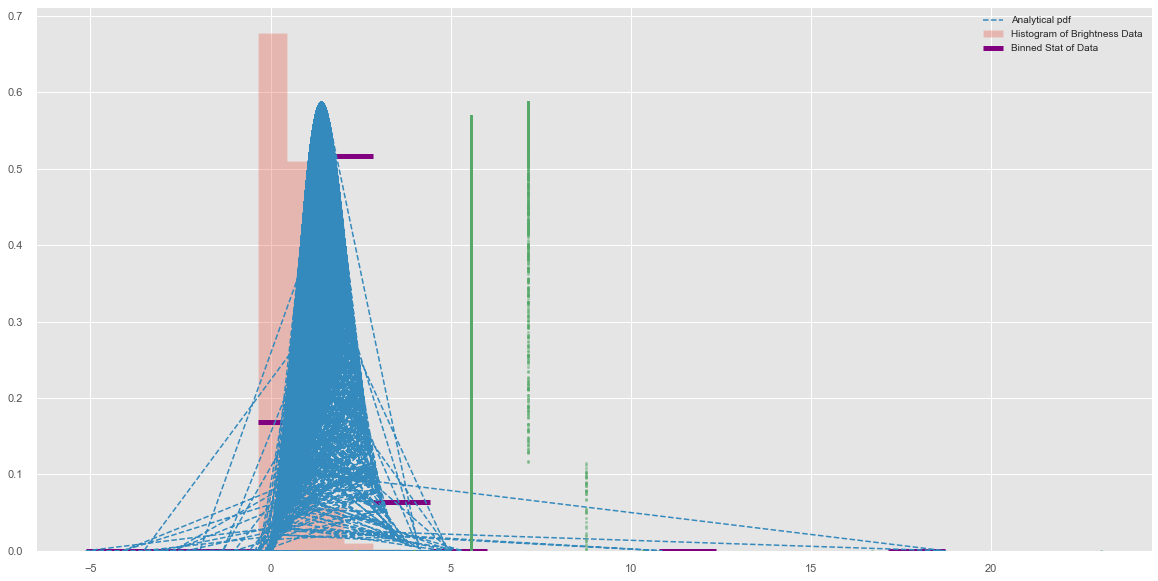

In [165]:
dataPDF = stats.maxwell.pdf(data)
bin_means, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='mean', bins=15)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, '--', label = "Analytical pdf")
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

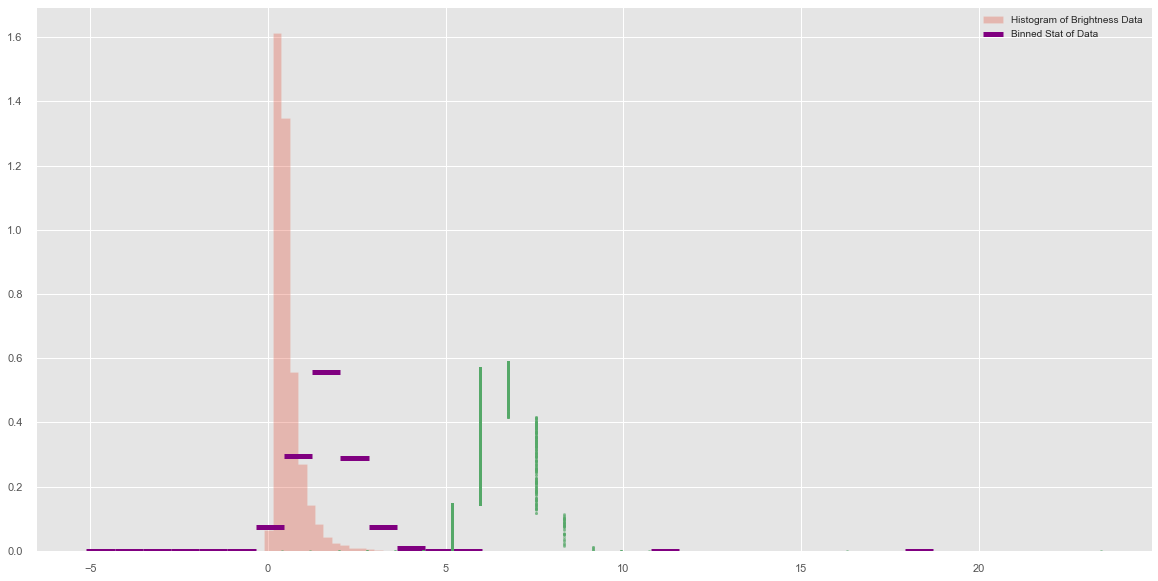

In [166]:
dataPDF = stats.maxwell.pdf(data)
bin_means, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='mean', bins=30)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=100, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

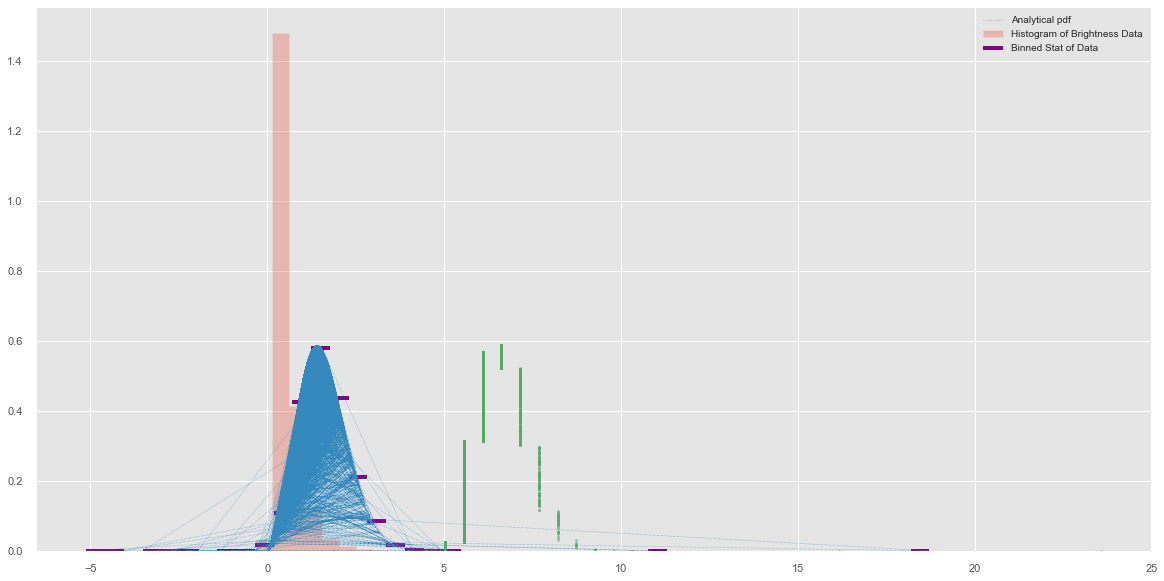

In [167]:
bin_median, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='median', bins=45)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=50, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, ':', label = "Analytical pdf", lw=0.5)
plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], colors='purple', lw=4, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

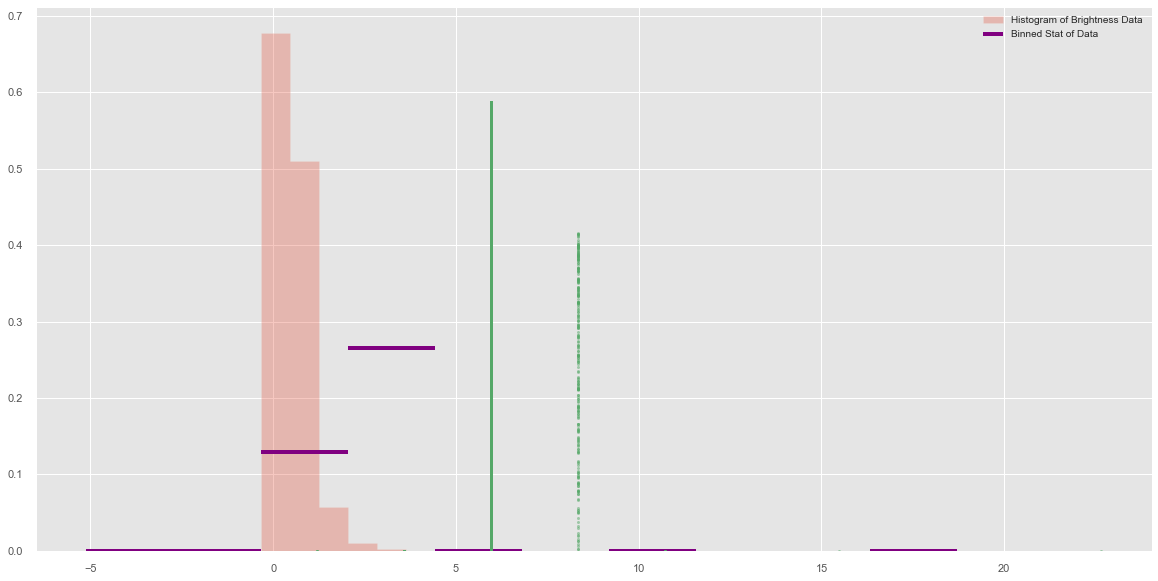

In [168]:
bin_median, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='median', bins=10)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], colors='purple', lw=4, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

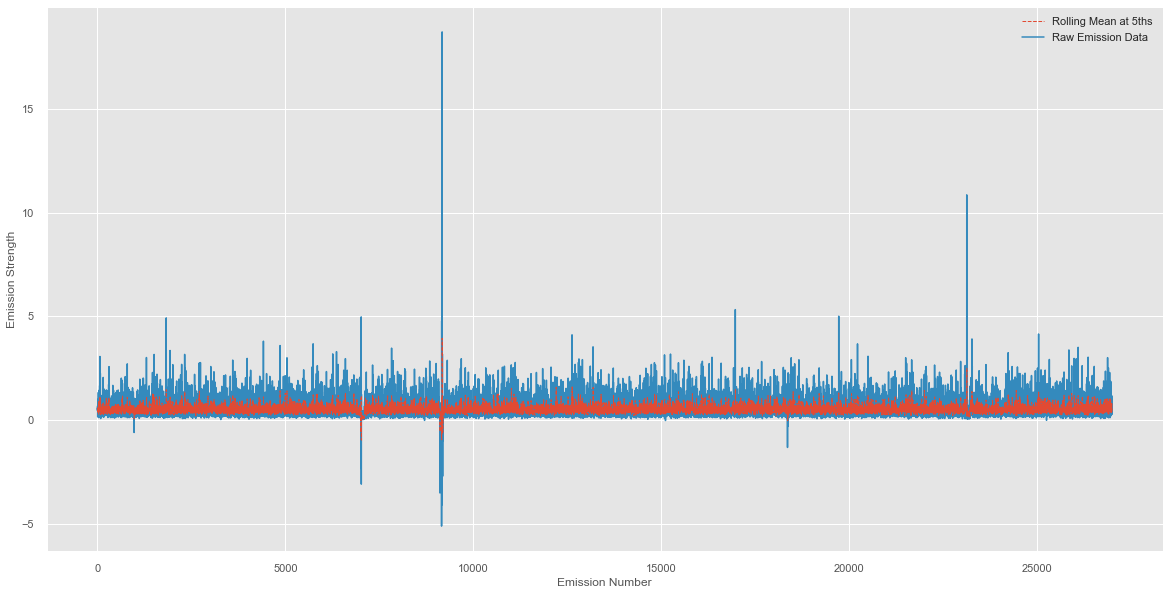

In [169]:
pulsar['RollingMeanEmissions5ths'] = pulsar["Brightness"].rolling(5).mean()

plt.figure(figsize=(20,10))
plt.plot(pulsar['RollingMeanEmissions5ths'], label="Rolling Mean at 5ths", lw=1, linestyle='--', zorder=2)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

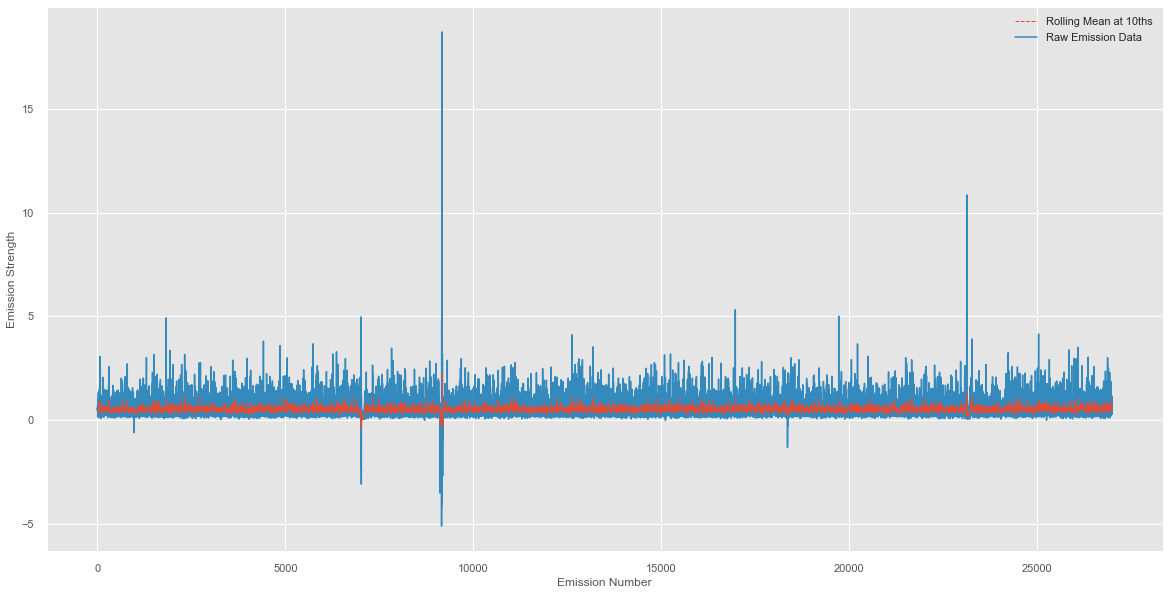

In [170]:
pulsar['RollingMeanEmissions10ths'] = pulsar["Brightness"].rolling(10).mean()

plt.figure(figsize=(20,10))
plt.plot(pulsar['RollingMeanEmissions10ths'], label="Rolling Mean at 10ths", lw=1, linestyle='--', zorder=2)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

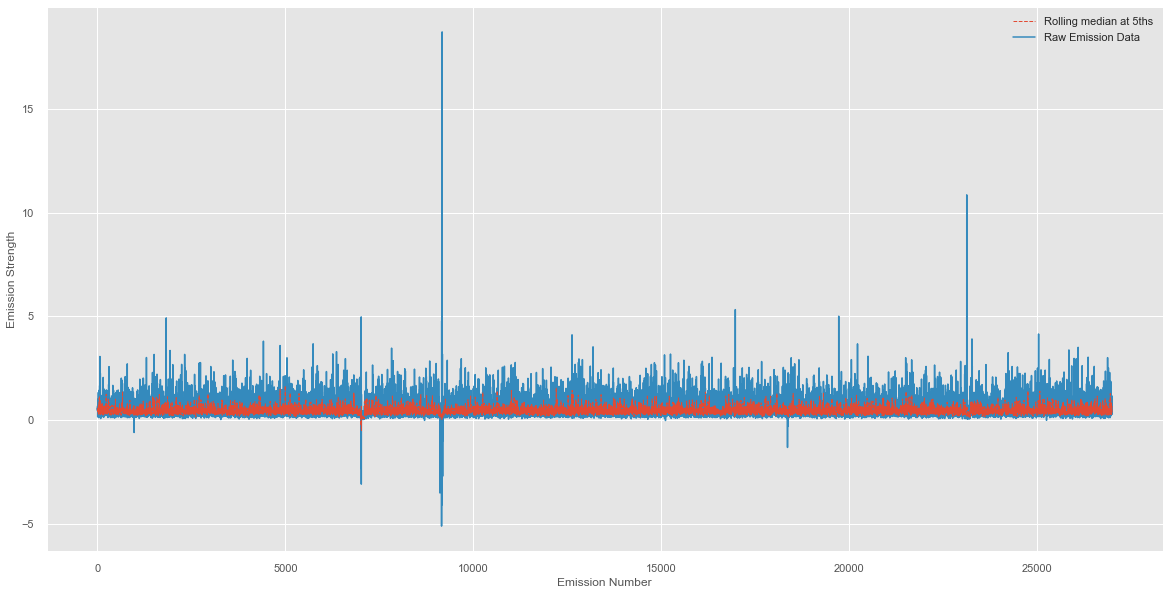

In [171]:
pulsar['RollingMedianEmissions5ths'] = pulsar["Brightness"].rolling(5).median()

plt.figure(figsize=(20,10))
plt.plot(pulsar['RollingMedianEmissions5ths'], label="Rolling median at 5ths", lw=1, linestyle='--', zorder=2)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

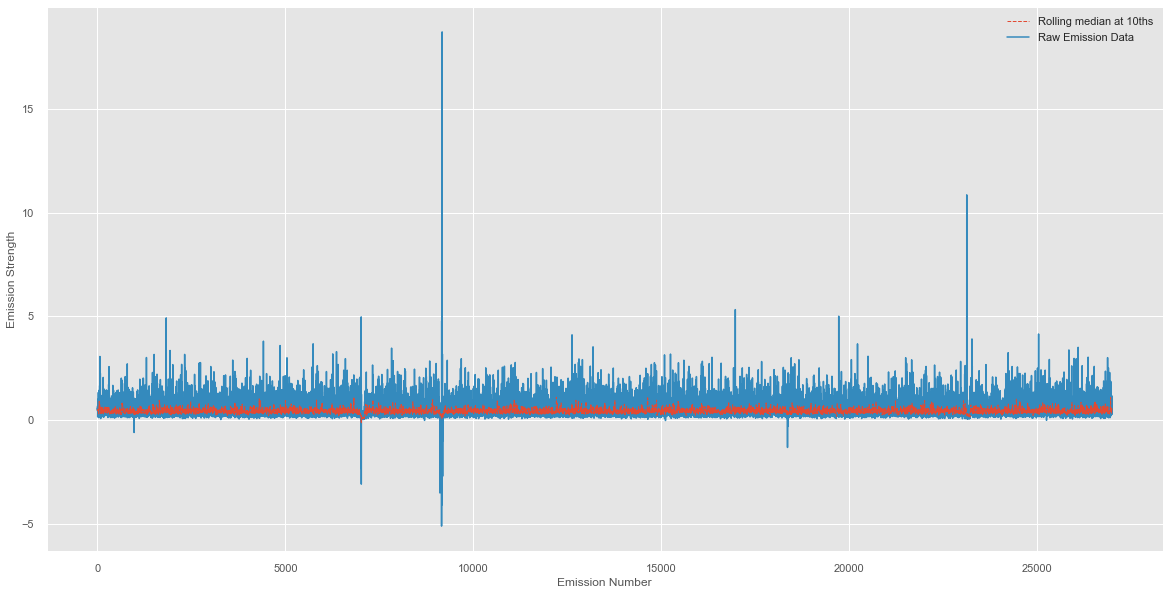

In [172]:
pulsar['RollingMedianEmissions10ths'] = pulsar["Brightness"].rolling(10).median()

plt.figure(figsize=(20,10))
plt.plot(pulsar['RollingMedianEmissions10ths'], label="Rolling median at 10ths", lw=1, linestyle='--', zorder=2)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

In [173]:
pulsar.head(25)

,Pulse Number,Brightness,Uncertainty,Binary,RollingMeanEmissions5ths,RollingMeanEmissions10ths,RollingMedianEmissions5ths,RollingMedianEmissions10ths
0,1,0.598393,0.056431,1,NaN,NaN,NaN,NaN
1,2,0.590859,0.055182,1,NaN,NaN,NaN,NaN
2,3,0.449643,0.063632,1,NaN,NaN,NaN,NaN
3,4,0.682860,0.056269,1,NaN,NaN,NaN,NaN
4,5,0.490026,0.046830,1,0.562356,NaN,0.590859,NaN
5,6,0.586071,0.052649,1,0.559892,NaN,0.586071,NaN
6,7,0.150353,0.056483,0,0.471791,NaN,0.490026,NaN
7,8,0.384684,0.052567,0,0.458799,NaN,0.490026,NaN
8,9,0.429094,0.055569,1,0.408046,NaN,0.429094,NaN
9,10,0.995865,0.075811,1,0.509214,0.535785,0.429094,0.538048


## Binary Classification

In [174]:
X = pulsar[['Brightness', 'Uncertainty']]
y = pulsar['Binary']

In [175]:
X.head()

,Brightness,Uncertainty
0,0.598393,0.056431
1,0.590859,0.055182
2,0.449643,0.063632
3,0.682860,0.056269
4,0.490026,0.046830


In [176]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Binary, dtype: int32

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

In [178]:
from sklearn.preprocessing import StandardScaler

train_scaler = StandardScaler()
X_train = train_scaler.fit_transform(X_train)

test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)

In [179]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [180]:
predictions = model.predict(X_test)

In [181]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  2714
False Positive(FP) =  151
True Negative(TN)  =  2535
False Negative(FN) =  0


In [182]:
# accuracy, recall, precision and F1

acc = (2689 + 2603)/(2689 + 2603 + 108 + 0)
recall = (2689)/(0+2689)
precision = (2689)/(2689+108)
f1 = (2)/((1/recall)+ (1/precision))

print(acc)
print(recall)
print(precision)
print(f1)

0.98
1.0
0.9613872005720415
0.9803135253372222


In [183]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print("Accuracy of the model is ", accuracy)

Accuracy of the model is  0.972037037037037


## Bidirectional LSTM Model

In [184]:
# making a list with the brightness and uncertainty values
values_list = pulsar[['Brightness', 'Uncertainty']].values.tolist()
values_list[:10]

[[0.5983928, 0.0564313],
 [0.5908588, 0.05518188],
 [0.4496432, 0.06363222],
 [0.6828599, 0.05626933],
 [0.4900255, 0.04683002],
 [0.5860711, 0.05264937],
 [0.1503529, 0.05648303],
 [0.3846841, 0.0525667],
 [0.4290943, 0.05556898],
 [0.9958652, 0.0758106]]

In [185]:
from sklearn import preprocessing

# normalizing the values
values_list = preprocessing.normalize(values_list)

In [186]:
# function for spliting a list in a format we can use in the model
def split_list(blist, steps):
    X, y = list(), list()
    for i in range(len(blist)):        
        end_ix = i + steps
        if end_ix > len(blist)-1:
            break    
        list_x, list_y = blist[i:end_ix], blist[end_ix][0]
        X.append(list_x)
        y.append(list_y)
    return array(X), array(y)

In [187]:
# splitting the list
X, y = split_list(values_list, 100)

# reshaping the list to feed the model
X = X.reshape((X.shape[0], X.shape[1], 2))

In [188]:
# splitting the list into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

In [189]:
# setting the parameters for the lstm model and compiling it
model = Sequential()
model.add(Bidirectional(LSTM(50), input_shape=(100, 2)))
model.add(Dense(25))
model.add(Dense(12))
model.add(Dense(6))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [191]:
# training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, verbose=1, batch_size=(int(X_train.shape[0]/50)))

Epoch 1/2
51/51 [==============================] - 16s 321ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2/2
51/51 [==============================] - 16s 321ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0020 - val_mse: 0.0020


In [192]:
X_test

array([[[0.99553523, 0.09439068],
        [0.98720336, 0.15946638],
        [0.99635322, 0.08532449],
        ...,
        [0.99387739, 0.11048857],
        [0.99641844, 0.08455935],
        [0.8243341 , 0.5661036 ]],

       [[0.99057614, 0.13696315],
        [0.99544821, 0.09530401],
        [0.9947645 , 0.10219393],
        ...,
        [0.99408919, 0.10856646],
        [0.94736357, 0.32015975],
        [0.99629784, 0.08596864]],

       [[0.97238382, 0.23338747],
        [0.98368855, 0.17988008],
        [0.97366938, 0.22796476],
        ...,
        [0.99671461, 0.08099377],
        [0.98860091, 0.15055979],
        [0.9980507 , 0.06240831]],

       ...,

       [[0.99022849, 0.13945445],
        [0.97307765, 0.23047754],
        [0.96903857, 0.24690938],
        ...,
        [0.95175352, 0.30686355],
        [0.99599942, 0.08935975],
        [0.99685317, 0.07927013]],

       [[0.94920777, 0.31464997],
        [0.99201513, 0.12611893],
        [0.98908038, 0.14737708],
        .

In [193]:
# predicting the y/brightness values for the test set
y_pred = model.predict(X_test, verbose=0)
y_pred[:10]

array([[0.98082703],
       [0.980616  ],
       [0.9810388 ],
       [0.9872831 ],
       [0.9871915 ],
       [0.9864086 ],
       [0.97754884],
       [0.98505926],
       [0.97542995],
       [0.9771127 ]], dtype=float32)

In [194]:
y_test[:10]

array([0.98323453, 0.98127979, 0.9970731 , 0.99812731, 0.99129736,
       0.98806795, 0.99697155, 0.98026025, 0.99583156, 0.99858726])

In [195]:
# evaluating the model
model.evaluate(X_test, y_test)

169/169 [==============================] - 1s 8ms/step - loss: 0.0020 - mse: 0.0020


[0.002021806314587593, 0.002021806314587593]

In [196]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RSE: ', math.sqrt(mean_absolute_error(y_test, y_pred)))

R2 Score:  0.12238752597919222
MAE:  0.014404269431746707
RSE:  0.12001778798056023


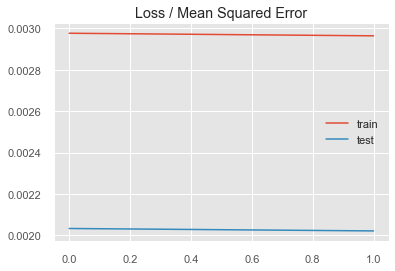

In [197]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [198]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar2 = pd.read_csv("Data/J0953+0755.pulses", sep = ' ', header = None, names = colnames)

newVals = pulsar2[['Brightness', 'Uncertainty']].values.tolist()

In [199]:
newVals = preprocessing.normalize(newVals)

def split_list(blist, steps):
    X, y = list(), list()
    for i in range(len(blist)):        
        end_ix = i + steps
        if end_ix > len(blist)-1:
            break    
        list_x, list_y = blist[i:end_ix], blist[end_ix][0]
        X.append(list_x)
        y.append(list_y)
    return array(X), array(y)

# splitting the list
X, y = split_list(values_list, 100)

# reshaping the list to feed the model
X = X.reshape((X.shape[0], X.shape[1], 2))

    

In [200]:
X[10]

array([[0.99728504, 0.07363802],
       [0.99484056, 0.1014508 ],
       [0.97886433, 0.20451067],
       [0.9950061 , 0.09981416],
       [0.99704107, 0.07687074],
       [0.99034267, 0.13864126],
       [0.99403905, 0.10902464],
       [0.97556486, 0.21971163],
       [0.99321756, 0.1162707 ],
       [0.97262106, 0.2323968 ],
       [0.98677407, 0.16210165],
       [0.99550155, 0.09474528],
       [0.99032304, 0.13878137],
       [0.99536481, 0.09617121],
       [0.99758869, 0.06940314],
       [0.99659603, 0.08244001],
       [0.98475538, 0.17394493],
       [0.98851646, 0.15111326],
       [0.98184257, 0.18969755],
       [0.99369597, 0.1121085 ],
       [0.99021523, 0.13954858],
       [0.99315489, 0.11680483],
       [0.96742421, 0.2531608 ],
       [0.99408912, 0.10856716],
       [0.97794922, 0.20884282],
       [0.90915773, 0.41645195],
       [0.986062  , 0.16637828],
       [0.99868139, 0.05133689],
       [0.99863995, 0.05213691],
       [0.996267  , 0.0863254 ],
       [0.

In [201]:
y[10]

0.9972710466812622

In [202]:
predOut = model.predict(X, verbose=0)

In [203]:
predOut[10]

array([0.98242664], dtype=float32)

## ML Evaluation.

### Logistic Regression

Rewards no significant results for this type of analysis and is dropped for a LSTM attempt

### Bidirectional LSTM

Loss is low so the model is performing well. But the accuracy is low therefore unable to obtain trend and therefore not rewarding any information. This means we cannot predict any of the values with confidence.

### attempt at predicting pulsar 2 with pulsar 1 as training set.

It has failed, no meaningful results returned


# Preliminary runs test
### Math Logic

$$ Z = {R - \tilde{R} \over s_{R}} $$

$$ \tilde{R} = {2_{n1 n2} \over n1 + n2} + 1 $$

$$  s^2_{R} = {2_{n1n2}(2{n1n2-n1-n2}) \over (n1+n2)^2(n1+n2-1) }$$

link to resource: https://www.geeksforgeeks.org/runs-test-of-randomness-in-python/

$ Z_{critical} = 1.96 $ as the confidence interval level of 95% thus this is a 2 tailed test. If the probability as corrosponding to this confidence interval $ H_{null} $ will be rejected as it is not statistically significant as denoted by $|Z| > Z_{critical} $

There is also code attempting to change it from a z-score probability to a P-score for ease of understanding and clarity.

# FUNCTION CODE FOR RUNS TEST




# Below we begin autocorrelation and autocovariance analysis

To get started with this I am playing around with guide from: https://towardsdatascience.com/a-step-by-step-guide-to-calculating-autocorrelation-and-partial-autocorrelation-8c4342b784e8

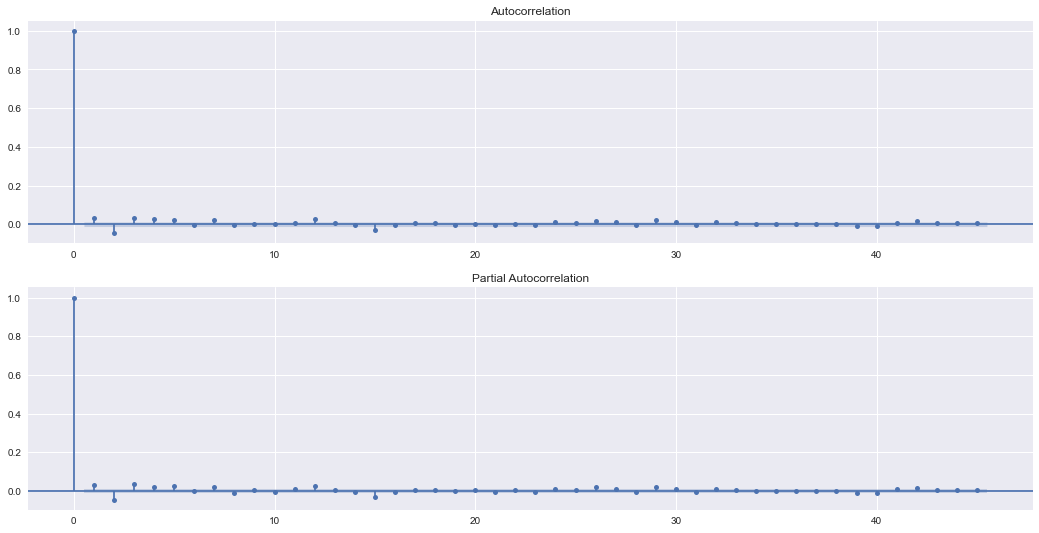

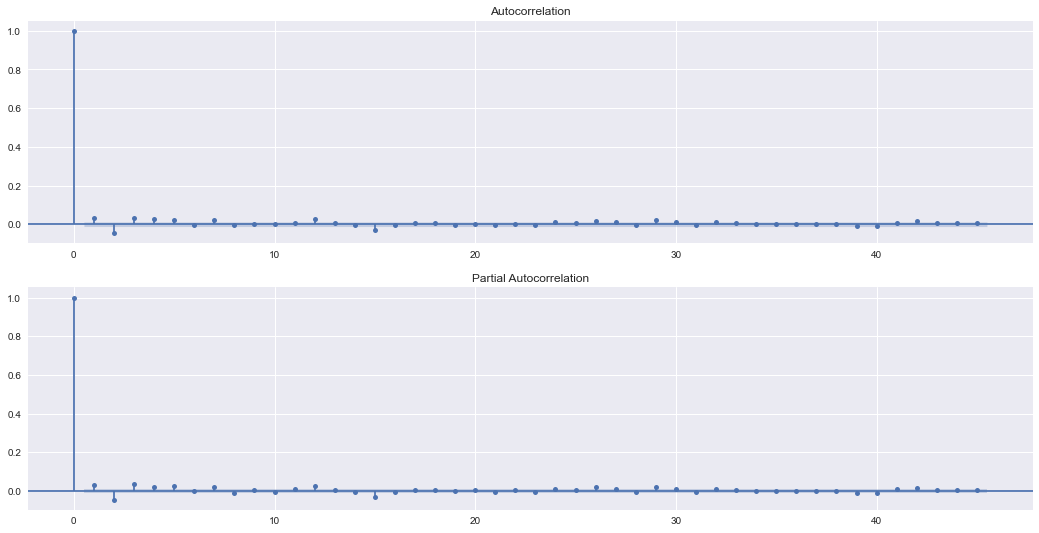

In [204]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar['Brightness'], ax=ax[0])
plot_pacf(pulsar['Brightness'], ax=ax[1], method="ols")

In [205]:
acf(pulsar['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00,  3.02297520e-02, -4.45596588e-02,  3.11934730e-02,
        2.59222929e-02,  2.29438690e-02, -2.72483478e-03,  2.17140483e-02,
       -5.63815508e-03,  1.61127481e-03, -7.10167005e-04])

In [206]:
acfpulsar = pd.DataFrame()
for lag in range(0,11):
    acfpulsar[f"B_lag_{lag}"] = pulsar['Brightness'].shift(lag)


acfpulsar

,B_lag_0,B_lag_1,B_lag_2,B_lag_3,B_lag_4,B_lag_5,B_lag_6,B_lag_7,B_lag_8,B_lag_9,B_lag_10
0,0.598393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.590859,0.598393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.449643,0.590859,0.598393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.682860,0.449643,0.590859,0.598393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.490026,0.682860,0.449643,0.590859,0.598393,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26995,0.539079,0.396929,1.014446,0.659313,1.173766,0.606806,0.500412,0.409631,0.698172,0.262350,0.447577
26996,0.324070,0.539079,0.396929,1.014446,0.659313,1.173766,0.606806,0.500412,0.409631,0.698172,0.262350
26997,0.291341,0.324070,0.539079,0.396929,1.014446,0.659313,1.173766,0.606806,0.500412,0.409631,0.698172
26998,0.346267,0.291341,0.324070,0.539079,0.396929,1.014446,0.659313,1.173766,0.606806,0.500412,0.409631


In [207]:
acfpulsar.corr()["B_lag_0"].values

array([ 1.00000000e+00,  3.02297663e-02, -4.45598682e-02,  3.11938480e-02,
        2.59227920e-02,  2.29443159e-02, -2.72489307e-03,  2.17154085e-02,
       -5.63853223e-03,  1.61145686e-03, -7.10263111e-04])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [208]:
held5ths = pulsar[pulsar.index % 5 == 0]
held5ths

,Pulse Number,Brightness,Uncertainty,Binary,RollingMeanEmissions5ths,RollingMeanEmissions10ths,RollingMedianEmissions5ths,RollingMedianEmissions10ths
0,1,0.598393,0.056431,1,NaN,NaN,NaN,NaN
5,6,0.586071,0.052649,1,0.559892,NaN,0.586071,NaN
10,11,0.670907,0.049539,1,0.526181,0.543036,0.429094,0.538048
15,16,0.404870,0.056679,0,0.454187,0.490184,0.465406,0.447250
20,21,0.297223,0.048826,0,0.350959,0.402573,0.297223,0.414102
...,...,...,...,...,...,...,...,...
26975,26976,0.384184,0.070075,0,0.595775,0.483936,0.516402,0.474701
26980,26981,0.317133,0.055033,0,0.589773,0.592774,0.317133,0.474701
26985,26986,0.447577,0.054011,1,0.440076,0.514925,0.447577,0.382355
26990,26991,0.606806,0.043464,1,0.495474,0.467775,0.500412,0.450191


In [209]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

0.43021975

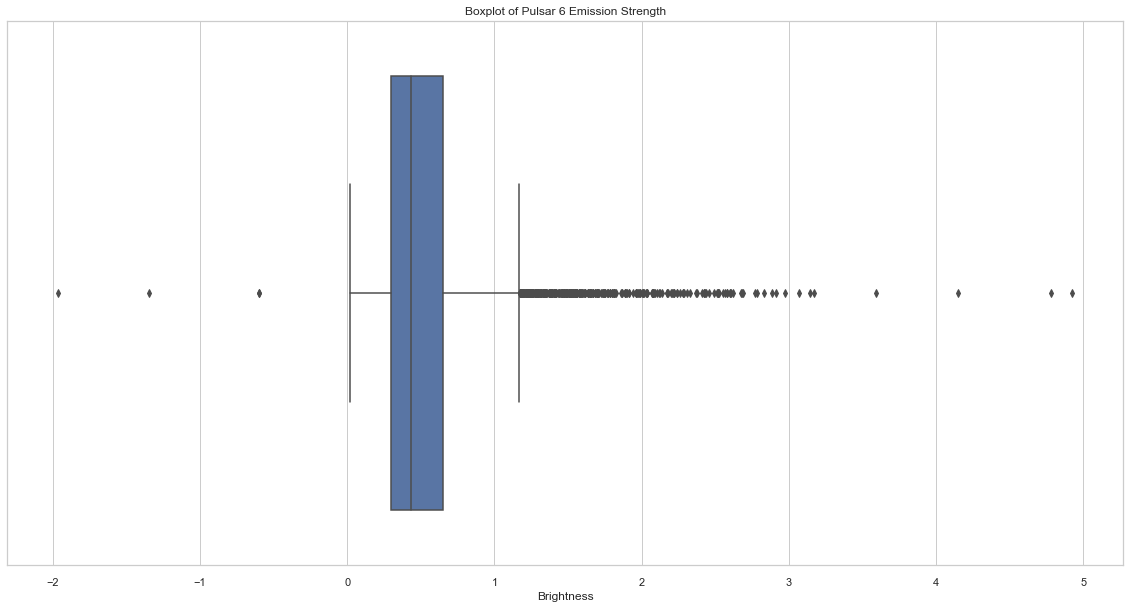

In [210]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


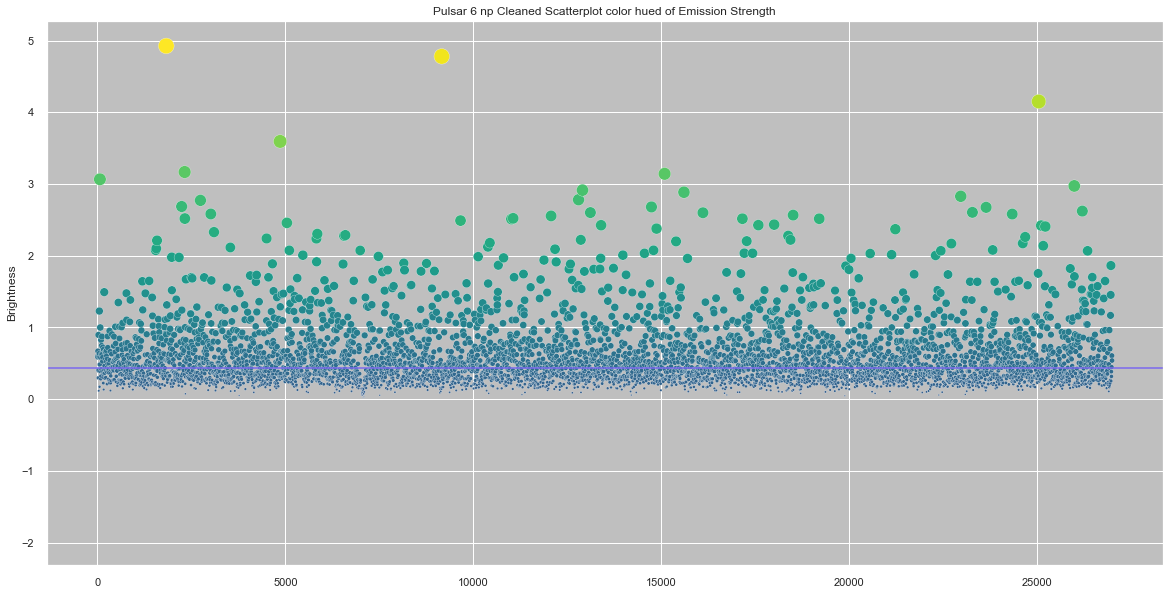

In [211]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.43021975, ls='-',c='mediumslateblue')

In [212]:
#plt.figure(figsize=(20,10))
#sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#strength = held5ths.Brightness.values
#ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')
#ax = sns.swarmplot(data=held5ths["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [213]:
print(len(held5ths[(held5ths.Brightness > 0.43021975)]))
print(len(held5ths[(held5ths.Brightness < 0.43021975)]))

2700
2700


#### Randomness testing

In [214]:
np.savetxt(r'every5thbinarypulsar1.txt', held5ths.Binary, fmt='%d', delimiter='')
np.savetxt(r'allpulsar1.txt', pulsar.Binary, fmt='%d', delimiter='')

In [215]:
pulsar.Binary

0        1
1        1
2        1
3        1
4        1
        ..
26995    1
26996    0
26997    0
26998    0
26999    1
Name: Binary, Length: 27000, dtype: int32